# Red Neuronal: Clasificador de frutas

En esta práctica vamos a crear una red neuronal capaz de distinguir entre múltiples tipos de frutas, para ello utilizaremos un dataset de frutas que hemos descargado en local y que mostramos a continuación:

In [1]:
ls "./Lib/Datasets/Fruits/Training"


 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: A8D2-47DE

 Directorio de C:\Users\aperg\pythonEnvs\jupyterEnv\Lib\Datasets\Fruits\Training

27/05/2020  11:03    <DIR>          .
27/05/2020  11:03    <DIR>          ..
27/05/2020  11:01    <DIR>          Apple Braeburn
27/05/2020  11:01    <DIR>          Apple Golden 1
27/05/2020  11:01    <DIR>          Apple Golden 2
27/05/2020  11:01    <DIR>          Apple Golden 3
27/05/2020  11:01    <DIR>          Apple Granny Smith
27/05/2020  11:01    <DIR>          Apple Red 1
27/05/2020  11:01    <DIR>          Apple Red 2
27/05/2020  11:01    <DIR>          Apple Red 3
27/05/2020  11:01    <DIR>          Apple Red Delicious
27/05/2020  11:01    <DIR>          Apple Red Yellow
27/05/2020  11:01    <DIR>          Apricot
27/05/2020  11:01    <DIR>          Avocado
27/05/2020  11:01    <DIR>          Avocado ripe
27/05/2020  11:01    <DIR>          Banana
27/05/2020  11:01    <DIR>          Banana Red
27/05/202

En primer lugar comprobamos que podemos acceder de forma adecuada a las imágenes del dataset desde nuestro entorno 

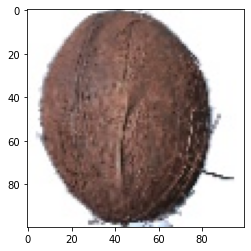

In [2]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('./Lib/Datasets/Fruits/Training/Cocos/100_100.jpg', 'r')
imshow(np.asarray(pil_im))

##### Datos, modelo y entrenamiento.

Creamos nuestro modelo, especificamos el conjunto de entrenamiento y el de validación, tras probar varias configuraciones y conseguir una precisión insuficiente probamos esta última cuya precisión es bastante alta y le permite a la red neuronal distinguir con bastante certeza entre cualquier tipo de fruta (si esta se encuentra en nuestro dataset).

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time

# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = './Lib/Datasets/Fruits/Training'
validation_data_dir = './Lib/Datasets/Fruits/Test'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(81, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 32

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=800,
)


Using TensorFlow backend.


Found 41322 images belonging to 81 classes.
Found 13877 images belonging to 81 classes.
Epoch 1/32
100/100 [==============================] - 23s 225ms/step - loss: 4.2743 - accuracy: 0.0350 - val_loss: 4.3184 - val_accuracy: 0.0154
Epoch 2/32
100/100 [==============================] - 21s 212ms/step - loss: 3.6164 - accuracy: 0.0945 - val_loss: 2.9966 - val_accuracy: 0.1764
Epoch 3/32
100/100 [==============================] - 21s 213ms/step - loss: 2.8598 - accuracy: 0.2125 - val_loss: 2.2852 - val_accuracy: 0.3177
Epoch 4/32
100/100 [==============================] - 21s 214ms/step - loss: 2.1223 - accuracy: 0.3720 - val_loss: 2.4505 - val_accuracy: 0.3567
Epoch 5/32
100/100 [==============================] - 22s 218ms/step - loss: 1.5524 - accuracy: 0.5245 - val_loss: 0.8572 - val_accuracy: 0.5830
Epoch 6/32
100/100 [==============================] - 22s 220ms/step - loss: 1.2100 - accuracy: 0.6180 - val_loss: 0.8576 - val_accuracy: 0.6868
Epoch 7/32
100/100 [======================

Como podemos observar al finalizar el entrenamiento hemos conseguido unos valores de precisión muy cercanos a uno, con lo cual podemos decir que nuestra red neuronal será capaz de reconocer con éxito prácticamente cualquier fruta del dataset.

A continuación, procedemos a poner a nuestra red neuronal a prueba para comprobar que efectivamente es capaz de reconocer las frutas, ponemos a prueba nuestro modelo en el siguiente fragmento de código:

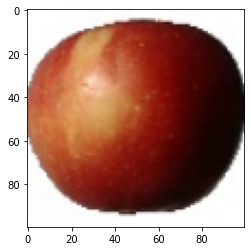

In [17]:
import os

loaded_image =keras.preprocessing.image.load_img(path='./Lib/Datasets/Fruits/Test/Apple Braeburn/3_100.jpg', target_size=(64,64,3))
img_array = keras.preprocessing.image.img_to_array(loaded_image) / 255.
img_np_array = np.expand_dims(img_array, axis = 0)
predictions = model.predict_classes(img_np_array)

%matplotlib inline
pil_im = Image.open('./Lib/Datasets/Fruits/Test/Apple Braeburn/3_100.jpg', 'r')
imshow(np.asarray(pil_im))

Como podemos ver hemos presentado una imagen de una manzana a nuestra red neuronal y hemos obtenido una serie de predicciones, en concreto usando el método predict_classes() hemos obtenido el número de la clase que ha reconocido la red neuronal.

Para obtener el nombre de dicha clase primero obtenemos un array con los nombres de las clases y buscamos el nombre de la clase que ha reconocido nuestra red neuronal gracias a la foto que le hemos pasado.

In [19]:
directory='./Lib/Datasets/Fruits/Test/'
dirlist = [ item for item in os.listdir(directory) if os.path.isdir(os.path.join(directory, item)) ]

dirlist[predictions[0]]

'Apple Braeburn'

Y efectivamente, nuestra red neuronal ha conseguido distinguir esa manzana de entre todas las clases disponibles, hemos hecho múltiples pruebas y es capaz de reconocer consistentemente las frutas que se encuentran en nuestro dataset.

Podemos concluir con que hemos creado con éxito nuestra red neuronal.